In [1]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn import svm

In [16]:
i=1
train_ce = pd.read_csv('./data/train_test/imp/ce5/ce_imp'+str(i)+'.csv',
                           index_col = 0)

In [19]:
def roc_auc_svm(i):
    data = pd.read_csv('./data/boston_transform.csv', index_col = 'original_idx')
    t = data['MEDV'].quantile(0.5)
    
    train_nan = pd.read_csv('./data/train_test/nan/boston_nan_'+str(i)+'.csv',
                           index_col = 'original_idx')

    train_cc = train_nan.dropna()
    X_cc = train_cc.iloc[:,:-1]
    y_cc = train_cc.iloc[:,-1]

    train_em = pd.read_csv('./data/train_test/imp/em5/em_imp'+str(i)+'.csv',
                           index_col = 0)
    X_em = train_em.iloc[:,:-1]
    y_em = train_em.iloc[:,-1]

    train_ce = pd.read_csv('./data/train_test/imp/ce5/ce_imp'+str(i)+'.csv',
                           index_col = 0)
    X_ce = train_ce.iloc[:,:-1]
    y_ce = train_ce.iloc[:,-1]

    train_sr = pd.read_csv('./data/train_test/imp/sr/imp_sto_'+str(i)+'.csv',
                           index_col = 0)
    X_sr = train_sr.iloc[:,:-2]
    y_sr = train_sr.iloc[:,-2]
    
    train_da = pd.read_csv('./data/train_test/imp/da_m1_i10/imp_da_m1_i10_'+str(i)+'.csv',
                           index_col = 0)
    train_da.loc[train_da.loc[:,'RAD']<0, 'RAD'] = 0
    X_da = train_da.iloc[:,:-2]
    y_da = train_da.iloc[:,-2]

    train_hd = pd.read_csv('./data/train_test/imp/hd/imp_hotdeck_'+str(i)+'.csv',
                           index_col = 0)
    X_hd = train_hd.iloc[:,:-7]
    y_hd = train_hd.iloc[:,-7]

    test = pd.read_csv('./data/train_test/test.csv',
                           index_col = 0)


    train_cc.loc[train_cc['MEDV'] < t, 'MEDV'] = 0
    train_cc.loc[train_cc['MEDV'] >= t, 'MEDV'] = 1

    train_em.loc[train_em['MEDV'] < t, 'MEDV'] = 0
    train_em.loc[train_em['MEDV'] >= t, 'MEDV'] = 1

    train_ce.loc[train_ce['X1.MEDV'] < t, 'X1.MEDV'] = 0
    train_ce.loc[train_ce['X1.MEDV'] >= t, 'X1.MEDV'] = 1
    
    train_sr.loc[train_sr['MEDV'] < t, 'MEDV'] = 0
    train_sr.loc[train_sr['MEDV'] >= t, 'MEDV'] = 1
    
    train_da.loc[train_da['MEDV'] < t, 'MEDV'] = 0
    train_da.loc[train_da['MEDV'] >= t, 'MEDV'] = 1
    
    train_hd.loc[train_hd['MEDV'] < t, 'MEDV'] = 0
    train_hd.loc[train_hd['MEDV'] >= t, 'MEDV'] = 1

    test.loc[test['MEDV'] < t, 'MEDV'] = 0
    test.loc[test['MEDV'] >= t, 'MEDV'] = 1
    
    clf = svm.SVC(kernel='linear', probability=True)

    X_test = test.iloc[:,:-1]
    y_test = test.iloc[:,-1].astype('int8')
    
    y_score_cc = clf.fit(X_cc, y_cc.astype('int8')).decision_function(X_test)
    y_score_em = clf.fit(X_em, y_em.astype('int8')).decision_function(X_test)
    y_score_ce = clf.fit(X_ce, y_ce.astype('int8')).decision_function(X_test)
    y_score_sr = clf.fit(X_sr, y_sr.astype('int8')).decision_function(X_test)
    y_score_da = clf.fit(X_da, y_da.astype('int8')).decision_function(X_test)
    y_score_hd = clf.fit(X_hd, y_hd.astype('int8')).decision_function(X_test)
    
    fpr_cc, tpr_cc, _ = roc_curve(1-y_test.astype('int8'), y_score_cc)
    roc_auc_cc = auc(fpr_cc, tpr_cc)
    
    fpr_em, tpr_em, _ = roc_curve(1-y_test.astype('int8'), y_score_em)
    roc_auc_em = auc(fpr_em, tpr_em)
    
    fpr_sr, tpr_sr, _ = roc_curve(1-y_test.astype('int8'), y_score_sr)
    roc_auc_sr = auc(fpr_sr, tpr_sr)
    
    fpr_ce, tpr_ce, _ = roc_curve(1-y_test.astype('int8'), y_score_ce)
    roc_auc_ce = auc(fpr_ce, tpr_ce)
    
    fpr_da, tpr_da, _ = roc_curve(1-y_test.astype('int8'), y_score_da)
    roc_auc_da = auc(fpr_da, tpr_da)
    
    fpr_hd, tpr_hd, _ = roc_curve(1-y_test.astype('int8'), y_score_hd)
    roc_auc_hd = auc(fpr_hd, tpr_hd)
    

    return {'em' : [fpr_em, tpr_em, roc_auc_em],
           'cc' : [fpr_cc, tpr_cc, roc_auc_cc],
           'ce' : [fpr_ce, tpr_ce, roc_auc_ce],
           'sr' : [fpr_sr, tpr_sr, roc_auc_sr],
           'da' : [fpr_da, tpr_da, roc_auc_da],
           'hd' : [fpr_hd, tpr_hd, roc_auc_hd]}

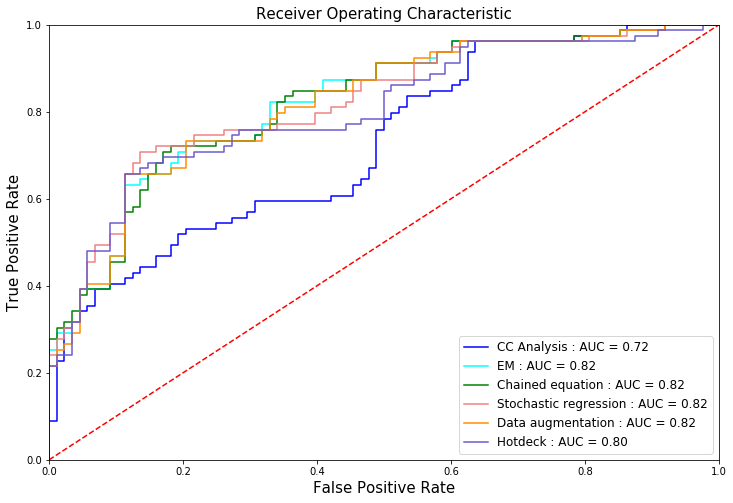

In [20]:
result = roc_auc_svm(1)

fpr_cc, tpr_cc, roc_auc_cc = result['cc']
fpr_em, tpr_em, roc_auc_em = result['em']
fpr_ce, tpr_ce, roc_auc_ce = result['ce']
fpr_sr, tpr_sr, roc_auc_sr = result['sr']
fpr_da, tpr_da, roc_auc_da = result['da']
fpr_hd, tpr_hd, roc_auc_hd = result['hd']


plt.figure(figsize=(12, 8))
plt.title('Receiver Operating Characteristic', fontsize = 15)

plt.plot(fpr_cc, tpr_cc, 'b', label = 'CC Analysis : AUC = %0.2f' % roc_auc_cc)

plt.plot(fpr_em, tpr_em, color = 'cyan',
         markersize=6, label = 'EM : AUC = %0.2f' % roc_auc_em)

plt.plot(fpr_ce, tpr_ce, color = 'green',
         markersize=8, label = 'Chained equation : AUC = %0.2f' % roc_auc_ce)

plt.plot(fpr_sr, tpr_sr, color = 'lightcoral',
         markersize=8, label = 'Stochastic regression : AUC = %0.2f' % roc_auc_sr)

plt.plot(fpr_da, tpr_da, color = 'darkorange',
         markersize=8, label = 'Data augmentation : AUC = %0.2f' % roc_auc_da)

plt.plot(fpr_hd, tpr_hd, color = 'slateblue',
         markersize=8, label = 'Hotdeck : AUC = %0.2f' % roc_auc_hd)

plt.legend(loc = 'lower right', fontsize = 12)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize = 15)
plt.xlabel('False Positive Rate', fontsize = 15)
plt.show()

In [ ]:
roc_auc_ = {'cc':[], 'em':[], 'ce':[], 'sr':[], 'da':[], 'hd':[]}
for i in range(1, 101):
    result = roc_auc_svm(i)
    roc_auc_['cc'].append(result['cc'][-1])
    roc_auc_['em'].append(result['em'][-1])
    roc_auc_['ce'].append(result['ce'][-1])
    roc_auc_['sr'].append(result['sr'][-1])
    roc_auc_['da'].append(result['da'][-1])
    roc_auc_['hd'].append(result['hd'][-1])
roc_auc_df = pd.DataFrame(roc_auc_)  